# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación  de datos**<a id='21'></a>

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

##  **2.2. Feature Engineering**<a id='22'></a>

En este notebook se pretende tratar los datos para mejorar los modelos que se han comprobado mejores en el notebook anterior `2a_ML_Baseline.ipynb`. 

Se crean dos dataset procesados:
1. Se seleccionan las variables indepedientes más influyentes mediante los métodos no supervisado de **PCA** y **RFE**.
2. Se balancean las variables utilizando el método de resampling: 

    2.1. Oversampling : **SMOTE**

    2.2. Combinación de under y oversampling: **SMOTEENN**
    
    2.3. Selección del método que se considere mejor.

***Balancing data:***

---

*`Dataset completo (sin feature selection)`*


In [40]:
df_train=pd.read_csv(r'C:\Users\Jaime\Desktop\Oversampling\adults_cleaned_encoded3.csv')
df_train.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Definir los datos de entrenamiento y la variable objetivo
X = df_train.drop(columns=['class_>50K'])  # DataFrame sin la columna objetivo 'class'
y = df_train['class_>50K']  # Serie con la columna objetivo 'class'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (32537, 88)
Train features shape: (26029, 88)
Train target shape: (26029,)
Test features shape: (6508, 88)
Test target shape: (6508,)


In [43]:
X

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0,0,38,27,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32533,0,0,40,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32534,0,0,40,58,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32535,0,0,20,22,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

Before OverSampling, the shape of train_X: (26029, 88)
Before OverSampling, the shape of train_y: (26029,) 



Normalización y balanceo de clases: Si aplicas técnicas de sobremuestreo (como ROSE) para abordar el desequilibrio de clases, es posible que desees normalizar los datos después del balanceo de clases. Esto asegura que las muestras generadas durante el sobremuestreo estén en la misma escala que las muestras originales.

In [ ]:
El balanceo SMOTE (Synthetic Minority Over-sampling Technique) es una técnica utilizada para abordar el problema de desbalanceo de clases en conjuntos de datos de clasificación.

In [8]:
!pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 KB 1.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Jaime\.pyenv\pyenv-win\versions\3.10.4\python.exe -m pip install --upgrade pip' command.


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# Apply Oversampling
sm = SMOTE(random_state = 42) 
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel()) # type: ignore

In [14]:

# Buscar valores nulos en el DataFrame 'df'
valores_nulos = df_train.isnull()

valores_nulos

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
total_valores_nulos = df_train.isnull().sum().sum()

total_valores_nulos

0

<Axes: ylabel='count'>

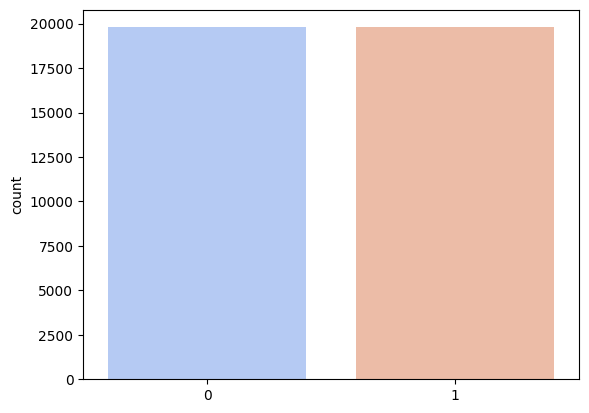

In [19]:
sns.countplot(x=y_train_SMOTE,palette='coolwarm')

In [21]:
import matplotlib.pyplot as plt

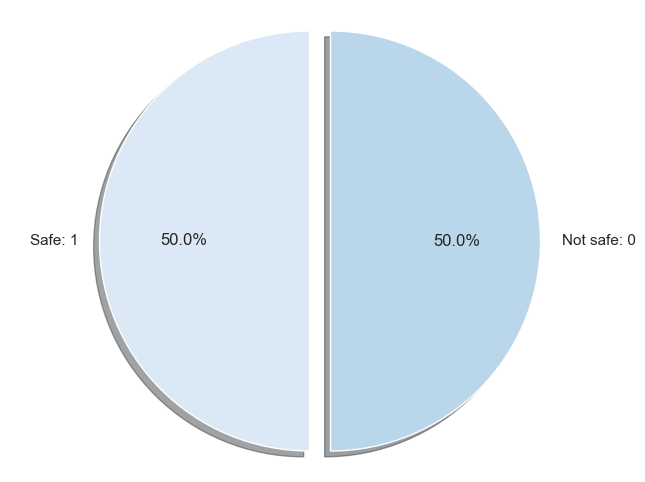

In [23]:
sns.set(rc={'figure.figsize':(8, 6)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_SMOTE.sum(),len(y_train_SMOTE)-y_train_SMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [24]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 

After OverSampling, the shape of train_X: (39586, 88)
After OverSampling, the shape of train_y: (39586,) 



In [26]:
from imblearn.combine import SMOTEENN


In [27]:
# Apply Combining
sm = SMOTEENN(random_state = 42) 
X_train_SMOTEENN, y_train_SMOTEENN = sm.fit_resample(X_train, y_train.ravel()) 

<Axes: ylabel='count'>

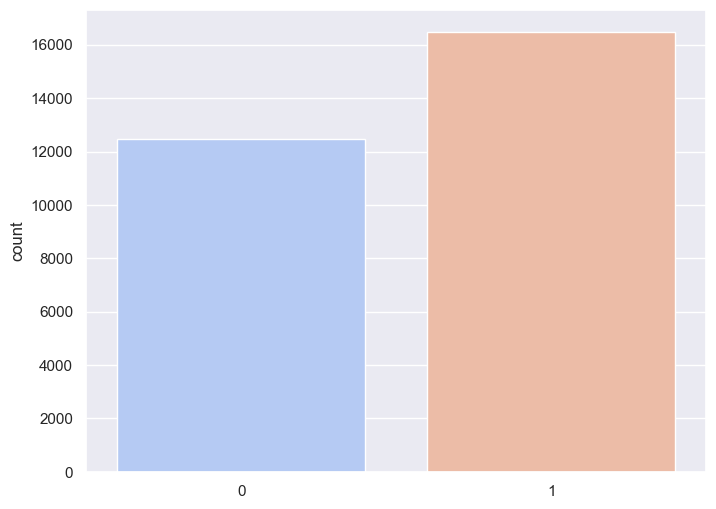

In [28]:
sns.countplot(x=y_train_SMOTEENN,palette='coolwarm')

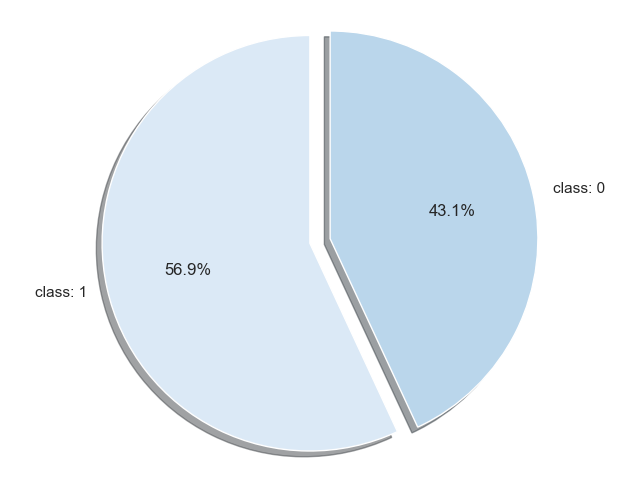

In [30]:
sns.set(rc={'figure.figsize':(8, 6)})
colors = sns.color_palette("Blues")

labels = ['class: 1','class: 0']
sizes =  [y_train_SMOTEENN.sum(),len(y_train_SMOTEENN)-y_train_SMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [31]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTEENN.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTEENN.shape)) 

After OverSampling, the shape of train_X: (28960, 88)
After OverSampling, the shape of train_y: (28960,) 



In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier())
#pipe = make_pipeline(StandardScaler(), GBC())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4905
           1       0.80      0.61      0.69      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508



In [35]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier())
pipe.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4905
           1       0.62      0.81      0.70      1603

    accuracy                           0.83      6508
   macro avg       0.77      0.82      0.79      6508
weighted avg       0.85      0.83      0.84      6508



In [36]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier())
pipe.fit(X_train_SMOTEENN,y_train_SMOTEENN)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      4905
           1       0.54      0.89      0.67      1603

    accuracy                           0.79      6508
   macro avg       0.75      0.82      0.76      6508
weighted avg       0.85      0.79      0.80      6508



In [37]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FS,y_train_FS)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1011
           1       0.71      0.46      0.56       269

    accuracy                           0.85      1280
   macro avg       0.79      0.71      0.73      1280
weighted avg       0.84      0.85      0.83      1280



In [38]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTE,y_train_FSSMOTE)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1011
           1       0.51      0.64      0.57       269

    accuracy                           0.80      1280
   macro avg       0.70      0.74      0.72      1280
weighted avg       0.82      0.80      0.80      1280



In [39]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTEENN,y_train_FSSMOTEENN)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1011
           1       0.45      0.61      0.52       269

    accuracy                           0.76      1280
   macro avg       0.67      0.71      0.68      1280
weighted avg       0.79      0.76      0.77      1280



**Observaciones:**

Se puede ver que utilizando como prueba el modelo GradientBoostClassifier() las mejores métricas están entre: 

- Dataset balanceado SMOTE : mejores métricas de Precision y RECALL. 
- Dataset balanceado con SMOTEENN combina oversampling and undersampling to balance the classes. : con un 95% de Precision y un recall alto aunque otros modelos lo tiene superior.

**Propuesta:**

- Prueba con ajuste de hiperparámetros para confirmar los datos obtenidos de la prueba general.


##  **2.3. Modelado**<a id='23'></a>

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Se seleccionan los cuatro estimadores que han ido liderando la tabla de métricas y se realiza de nuevo su modelado buscando aquellos parámetros que puedan optimizar el modelo.

- En primer, lugar se ajustan los hiperparámetros utilizando el dataset al que se le ha realizado el feature selection.
- Se ajusta los hiperparámetros con el dataset al que se le ha realizado feature selection y balanceo SMOTE.
- Se ajustan los hiperparámetros con el dataset completo y el balanceo aplicado sobre el mismo con el método SMOTE.

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Definir los hiperparametros del modelo Gradient Boost Classifier y XGBoost classifier
params = {
    'n_estimators': [100, 250],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],

}

In [48]:
k_fold= 10

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


Uso recall porque daba peor resultado antes 

In [51]:

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameters for the Gradient Boosting Classifier
gbc_params = {
    'n_estimators': [230, 400],
    'max_depth': [3, 6],
    'min_samples_split': [2, 3],
}

# Define the hyperparameters for the XGBoost Classifier
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],
}

def perform_grid_search(model_name, model, params, X_train, y_train, X_test, y_test, cv):
    # Create the GridSearchCV object for the specified model
    grid_search = GridSearchCV(model, params, scoring='recall', cv=cv, refit='precision')
    
    # Perform grid search using the scaled and balanced training data
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the performance of the best model on the test set using Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall of the best model {model_name} on the test set: {recall:.2f}")
    
    # Save the best model with Pickle
    with open(f"{model_name}_best_model.pkl", 'wb') as f:
        pickle.dump(best_model, f)
    
    # Return the best model and the grid search results
    return best_model, grid_search.cv_results_

# Perform grid search for the Gradient Boosting Classifier with balanced and scaled data
gbc_model, gbc_results = perform_grid_search('Gradient Boosting Classifier', GradientBoostingClassifier(), gbc_params, X_train_scaled, y_train_balanced, X_test_scaled, y_test, cv=k_fold)

# Perform grid search for the XGBoost Classifier with balanced and scaled data
xgb_model, xgb_results = perform_grid_search('XGBoost Classifier', XGBClassifier(), xgb_params, X_train_scaled, y_train_balanced, X_test_scaled, y_test, cv=k_fold)

Recall of the best model Gradient Boosting Classifier on the test set: 0.85
[14:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:56:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:56:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d57

El Modelo XGBoosting mantiene l mismo resultado tras el Grid Search

In [ ]:
<function recall_score at 0x0000022E18F7E8C0>

<a href='3-Resultados.ipynb'>Ver siguiente notebook</a>